In [36]:
## Import key libraries
import math
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [37]:
## Generate QPSK Symbols with Eb=1.0
N=200
ar=2.0*np.random.randint(2, size=N)-1.0
a=ar+1j*ai

In [38]:
## Overampling factor, i.e., number of samples per symbol period
M=64

In [25]:
# Use NRZ pulse shape
T = 1.0
Ts = T/M
W = 10.5
f = np.linspace(-W/T,W/T,4000)
NRZ = T*np.sin(np.pi*f*T)/(np.pi*f*T)

In [39]:
## Upsampling Filter
p_delta=np.zeros(M) # upsampling filter
p_delta[0]=1.0

In [40]:
## 3-dB cutoff frequency of the Butterworth low-pass filter
bw_filt = sig.butter(3, Wn=2/64 , btype='lowpass')

In [41]:
## Select a filter, the remainder of the notebook uses only p
p = bw_filt

In [42]:
## Upsampling data
u=sig.upfirdn(p_delta,a,M)
n1=np.arange(len(u))

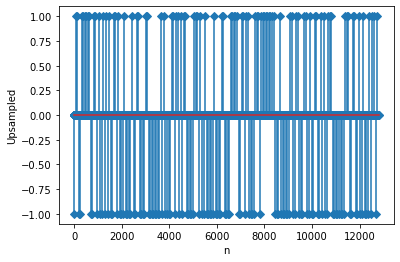

In [31]:
plt.stem(n1,np.real(u),markerfmt='D')
plt.xlabel('n')
plt.ylabel('Upsampled')
plt.show()

In [44]:
## Transmitter Pulse Shaped Data
s=sig.upfirdn(p,a,M)
n2=np.arange(len(s))

ValueError: h must be 1-D with non-zero length

In [33]:
plt.plot(n2,np.real(s))
plt.xlabel('n')
plt.ylabel('Pulse Shaped')
plt.show()

NameError: name 'n2' is not defined

In [34]:
## Receive Matched Filtered Data
r=sig.upfirdn(p,s)
n3=np.arange(len(r))

NameError: name 's' is not defined

In [35]:
plt.plot(n3,np.real(r))
plt.xlabel('n')
plt.ylabel('Matched Filter Output')
plt.show()

NameError: name 'n3' is not defined

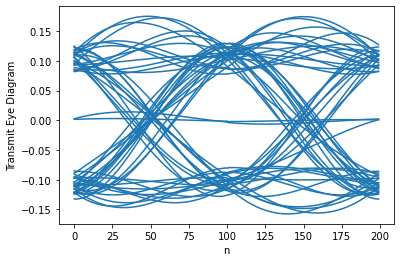

In [15]:
## Transmitter Eye Diagram

delay=int((len(p)-1)/2)
for k in range( math.floor( (len(s)-delay)/(2*M) ) ):
    plt.plot(np.real(s)[delay+k*2*M:delay+(k+1)*2*M],'C0-')
plt.xlabel('n')
plt.ylabel('Transmit Eye Diagram')
plt.show()

In [43]:
## Receiver Eye Diagram

delay=len(p)-1

for k in range( math.floor( (len(r)-delay)/(2*M) ) ):
    plt.plot(np.real(r)[delay+k*2*M:delay+(k+1)*2*M],'C0-')
plt.xlabel('n')
plt.ylabel('Receive Eye Diagram')
plt.show()

NameError: name 'r' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

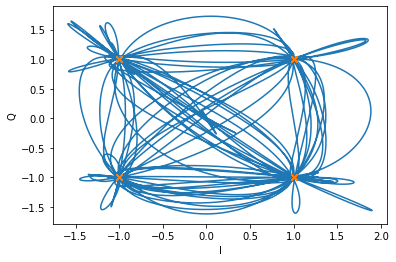

In [18]:
## Receiver Constellation Plot

plt.plot(np.real(r),np.imag(r))
plt.plot(np.real(a),np.imag(a),'x')
plt.xlabel('I')
plt.ylabel('Q')
plt.show